In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
### Reading the csv file
df = pd.read_csv('assignment-1-data.csv')
df.shape

(2938, 22)

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
### Checking if there is any null values in our data
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Dropping the NaN Values that affects our Life expectancy 
df_1 = df.dropna(subset=['Schooling','Income composition of resources','Life expectancy ','Adult Mortality',' BMI ',' HIV/AIDS','GDP','Diphtheria ',' thinness  1-19 years'])
df_2 = df.dropna(subset=['under-five deaths ','Hepatitis B','Life expectancy ','Alcohol','infant deaths',' HIV/AIDS','GDP','Diphtheria ',' thinness 5-9 years'])
df_3 = df.dropna(subset=['Total expenditure',' BMI ','Life expectancy ','Alcohol','Measles ','percentage expenditure','GDP','Population','Country'])

In [6]:
# Check
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(2450, 22)
(1857, 22)
(2101, 22)


In [7]:
# Check
print(df_1.isnull().sum())
print()
print(df_2.isnull().sum())
print()
print(df_3.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            146
percentage expenditure               0
Hepatitis B                        456
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  149
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                         220
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

Country                              0
Year                                 0
Status                               0
Life expect

In [8]:
# Deciding which features affects the value of life expentancy
cm = df.corr(method='pearson')

<AxesSubplot:>

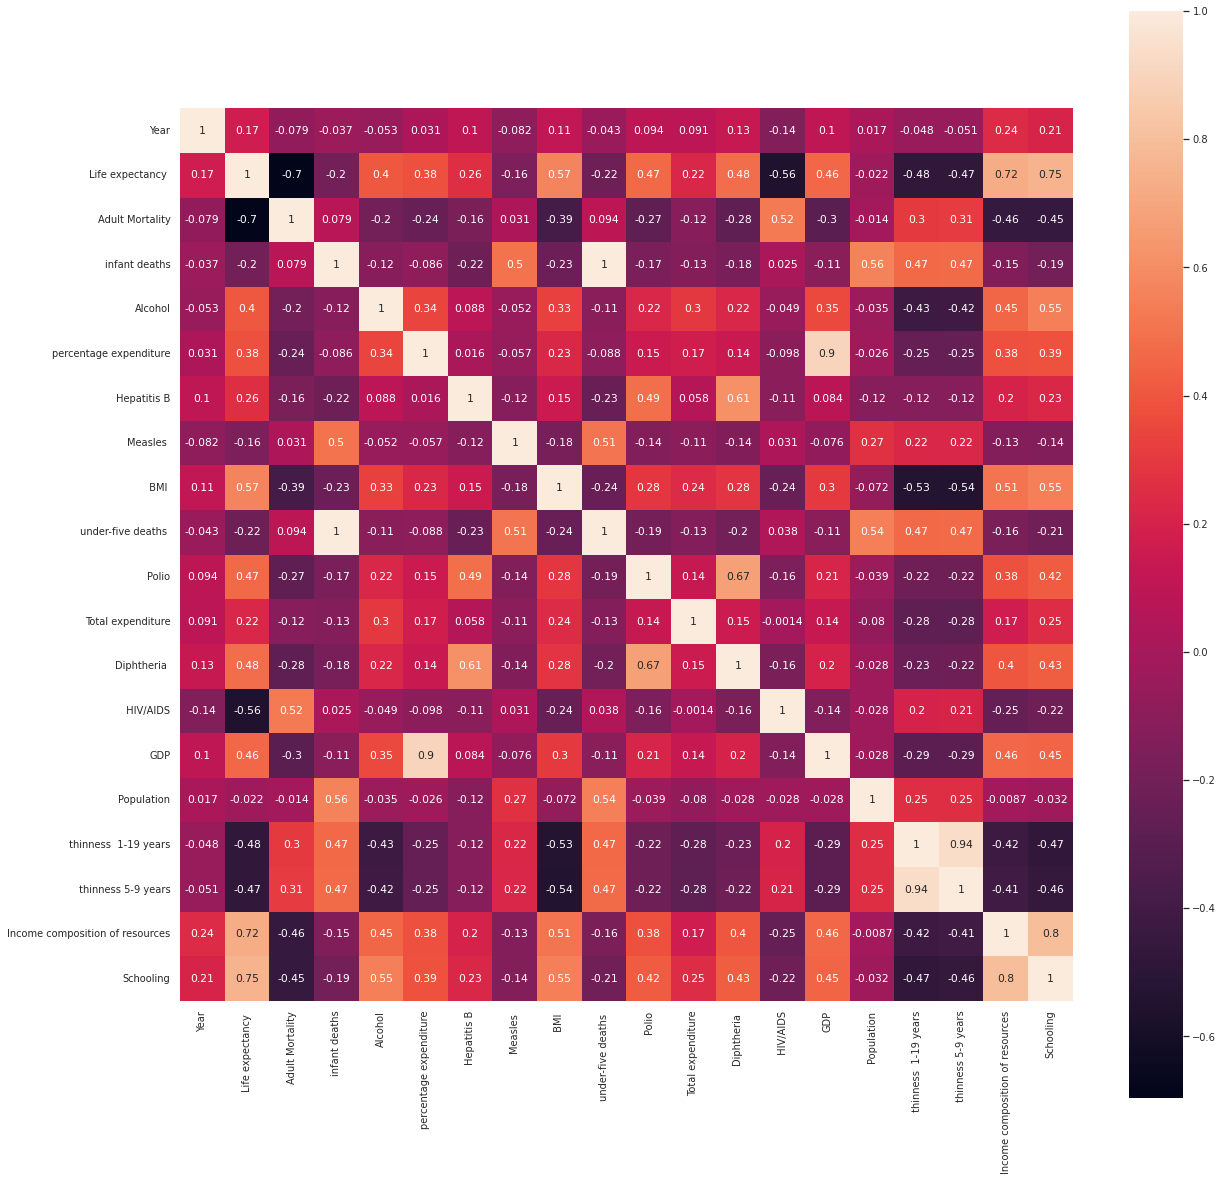

In [9]:
# Visualizing
sns.set(font_scale=0.9,rc = {'figure.figsize':(20,20)})

sns.heatmap(cm, cbar=True, annot=True, square=True)

In [10]:
df_3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Selecting our features and value that we are trying to predict 
df_1 = df_1.iloc[:,[3,4,10,14,15,16,18,20,21]]# Life Expectancy,Adult Mortality,BMI,Income composition of resources, Schooling,HIV/AIDS,GDP,thinness 1-19 years,Diphteria 
df_2 = df_2.iloc[:,[3,5,6,8,11,14,15,16,19]]
df_3 = df_3.iloc[:,[0,3,6,7,9,10,13,16,17]]

In [12]:
df_3.head()

,Country,Life expectancy,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,GDP,Population
0,Afghanistan,65.0,0.01,71.279624,1154,19.1,8.16,584.259210,33736494.0
1,Afghanistan,59.9,0.01,73.523582,492,18.6,8.18,612.696514,327582.0
2,Afghanistan,59.9,0.01,73.219243,430,18.1,8.13,631.744976,31731688.0
3,Afghanistan,59.5,0.01,78.184215,2787,17.6,8.52,669.959000,3696958.0
4,Afghanistan,59.2,0.01,7.097109,3013,17.2,7.87,63.537231,2978599.0


In [13]:
# Splitting Data

x = df_1.iloc[:,[1,2,3,4,5,6,7,8]].values # variables
y = df_1.iloc[:,[0]].values # Life expectancy
x1 = df_2.iloc[:,[1,2,3,4,5,6,7,8]].values # variables
y1 = df_2.iloc[:,[0]].values
x2 = df_3.iloc[:,[0,2,3,4,5,6,7,8]].values # variables
y2 = df_3.iloc[:,[1]].values

In [14]:
x2

array([['Afghanistan', 0.01, 71.27962362, ..., 8.16, 584.25921,
        33736494.0],
       ['Afghanistan', 0.01, 73.52358168, ..., 8.18, 612.696514,
        327582.0],
       ['Afghanistan', 0.01, 73.21924272, ..., 8.13, 631.744976,
        31731688.0],
       ...,
       ['Zimbabwe', 4.43, 0.0, ..., 6.53, 57.34834, 125525.0],
       ['Zimbabwe', 1.72, 0.0, ..., 6.16, 548.587312, 12366165.0],
       ['Zimbabwe', 1.68, 0.0, ..., 7.1, 547.3588785, 12222251.0]],
      dtype=object)

In [15]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [16]:
# Splitting data part2
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=147)
x1_train, x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=147)
x2_train, x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3, random_state=147)

In [17]:
x2_train

array([['Belize', 4.9, 251.6586929, ..., 4.5, 3419.275719, 254984.0],
       ['Belgium', 11.77, 702.359357, ..., 1.57, 4651.38647, 11182817.0],
       ['Bosnia and Herzegovina', 4.82, 38.25414065, ..., 8.28,
        344.321698, 3779468.0],
       ...,
       ['Zambia', 2.08, 10.85148218, ..., 4.37, 114.587985, 12725974.0],
       ['Bulgaria', 10.89, 591.5100978, ..., 6.41, 5932.899677,
        7545338.0],
       ['Germany', 11.5, 7777.556353, ..., 1.18, 41814.8191, 82266372.0]],
      dtype=object)

In [18]:
y_train

array([[72.3],
       [57.4],
       [67.9],
       ...,
       [82.4],
       [67. ],
       [59.4]])

In [19]:
# Scaling our features to -1 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_xtrain=scaler.fit_transform(x_train)

In [20]:
scaler_1 = MinMaxScaler(feature_range=(0,1))
scaled_x1train=scaler_1.fit_transform(x1_train)

In [21]:
#scaler_2 = MinMaxScaler(feature_range=(0,1))
#scaled_x2train=scaler_2.fit_transform(x2_train)

In [22]:
scaled_xtrain

array([[0.17458101, 0.31627297, 0.98969072, ..., 0.28985507, 0.63703704,
        0.5804878 ],
       [0.05586592, 0.30314961, 0.79381443, ..., 0.56521739, 0.59153439,
        0.56097561],
       [0.27653631, 0.74934383, 0.63917526, ..., 0.1884058 , 0.6962963 ,
        0.49268293],
       ...,
       [0.00698324, 0.83989501, 0.96907216, ..., 0.01811594, 0.92486772,
        0.85365854],
       [0.32541899, 0.22834646, 0.96907216, ..., 0.61594203, 0.        ,
        0.51219512],
       [0.04608939, 0.16404199, 0.96907216, ..., 0.33695652, 0.        ,
        0.26341463]])

In [23]:
# Creating our model
model = LinearRegression()
model_1 = LinearRegression()

In [24]:
model.fit(scaled_xtrain,y_train)
model_1.fit(scaled_x1train,y1_train)

LinearRegression()

In [25]:
# Scaling our test values to 0-1 scale NOT FITTING
scaled_Xtest=scaler.transform(x_test)
y_predict=model.predict(scaled_Xtest)

In [26]:
#Running our model and predicting
scaled_X1test=scaler_1.transform(x1_test)
y1_predict=model_1.predict(scaled_X1test)

In [27]:
# Evaluating
print("Model_0 3 scores below")
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
print(r2_score(y_test,y_predict))
print()
print('Model_1 3 scores below')
print(mean_absolute_error(y1_test,y1_predict))
print(mean_squared_error(y1_test,y1_predict))
print(r2_score(y1_test,y1_predict))

Model_0 3 scores below
2.9906658831984165
16.31082140360758
0.8225751887180066

Model_1 3 scores below
4.014039936458335
26.018867456574167
0.6450320022632017
